In [15]:
pip install IMDbPY

In [16]:
import imdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Initialize the IMDb object
ia = imdb.IMDb()

# Function to get data for multiple movies
def get_movie_data(movie_ids):
    movie_data = []

    for movie_id in movie_ids:
        try:
            movie = ia.get_movie(movie_id)
            data = {
                'movie_id': movie.movieID,
                'title': movie.get('title', ''),
                'year': movie.get('year', None),
                'rating': movie.get('rating', None),
                'votes': movie.get('votes', None),
                'genres': movie.get('genres', []),
                'duration': movie.get('runtime', [None])[0],  # Some movies have multiple durations
            }
            movie_data.append(data)
        except Exception as e:
            print(f"Error retrieving data for movie ID {movie_id}: {e}")

    return movie_data

# Example movie IDs (You can replace these with your own list)
movie_ids = ['0111161', '0068646', '0468569', '0137523', '0109830']  # Example: Shawshank Redemption, The Godfather, etc.

# Get movie data
movie_data = get_movie_data(movie_ids)

# Convert to DataFrame
df = pd.DataFrame(movie_data)

display(df)

,movie_id,title,year,rating,votes,genres,duration
0,0111161,The Shawshank Redemption,1994,9.3,2971414,[Drama],142
1,0068646,The Godfather,1972,9.2,2072597,"[Crime, Drama]",175
2,0468569,The Dark Knight,2008,9.0,2952689,"[Action, Crime, Drama, Thriller]",152
3,0137523,Fight Club,1999,8.8,2401868,[Drama],139
4,0109830,Forrest Gump,1994,8.8,2325186,"[Drama, Romance]",142


In [17]:
# Data Cleaning
df.dropna(subset=["rating"], inplace=True)  # Remove rows with missing ratings

# Display the data
display(df.head())

,movie_id,title,year,rating,votes,genres,duration
0,0111161,The Shawshank Redemption,1994,9.3,2971414,[Drama],142
1,0068646,The Godfather,1972,9.2,2072597,"[Crime, Drama]",175
2,0468569,The Dark Knight,2008,9.0,2952689,"[Action, Crime, Drama, Thriller]",152
3,0137523,Fight Club,1999,8.8,2401868,[Drama],139
4,0109830,Forrest Gump,1994,8.8,2325186,"[Drama, Romance]",142


In [18]:
# Descriptive Analysis
# Summary statistics of numerical columns
print(df.describe())

              year    rating         votes
count     5.000000  5.000000  5.000000e+00
mean   1993.400000  9.020000  2.544751e+06
std      13.258959  0.228035  4.000026e+05
min    1972.000000  8.800000  2.072597e+06
25%    1994.000000  8.800000  2.325186e+06
50%    1994.000000  9.000000  2.401868e+06
75%    1999.000000  9.200000  2.952689e+06
max    2008.000000  9.300000  2.971414e+06


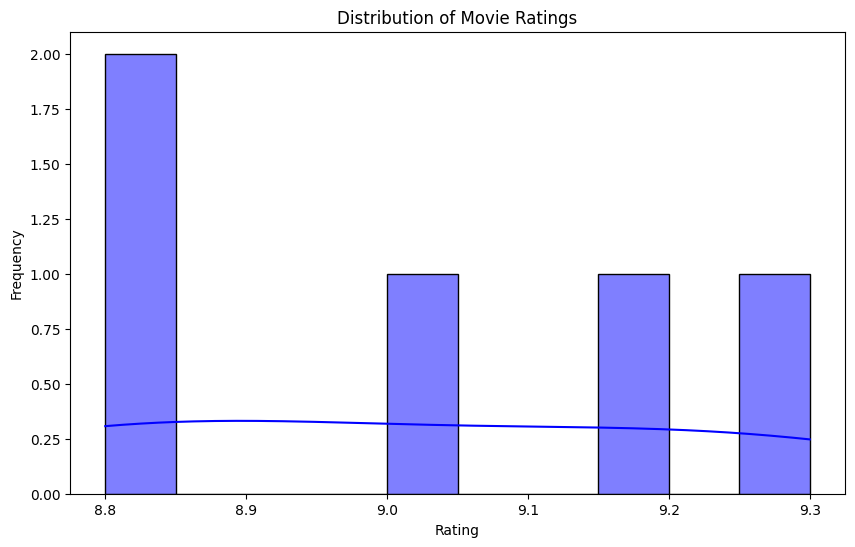

In [19]:
# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df["rating"], bins=10, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Inferential Analysis - Hypothesis Testing
# Hypothesis: Is there a significant difference in average ratings between different genres?

# Filter by genre (e.g., 'Drama' and 'Action')
drama_movies = df[df['genres'].apply(lambda x: 'Drama' in x)]
action_movies = df[df['genres'].apply(lambda x: 'Action' in x)]

# Test if the mean ratings of Action and Drama movies are significantly different
t_stat, p_value = stats.ttest_ind(drama_movies['rating'], action_movies['rating'], nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in average ratings between Drama and Action movies.")
else:
    print("There is no significant difference in average ratings between Drama and Action movies.")


T-statistic: 0.08006407690254196, P-value: 0.9400320000000012
There is no significant difference in average ratings between Drama and Action movies.


Correlation between Rating and Votes: 0.2906817451909082, P-value: 0.6351727395800394


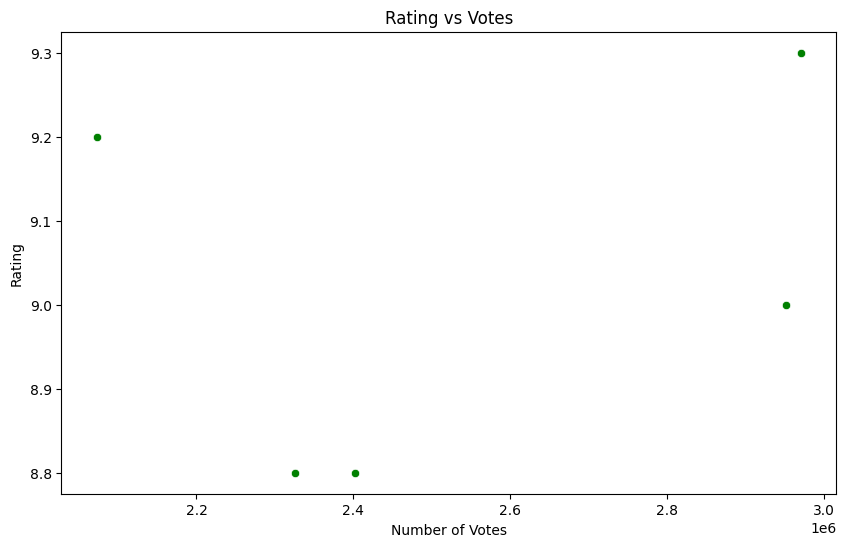

In [21]:
# Correlation between Rating and Votes
# Pearson correlation test between rating and votes
correlation, p_value = stats.pearsonr(df['rating'], df['votes'])
print(f"Correlation between Rating and Votes: {correlation}, P-value: {p_value}")

# Visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['votes'], y=df['rating'], color='green')
plt.title('Rating vs Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()

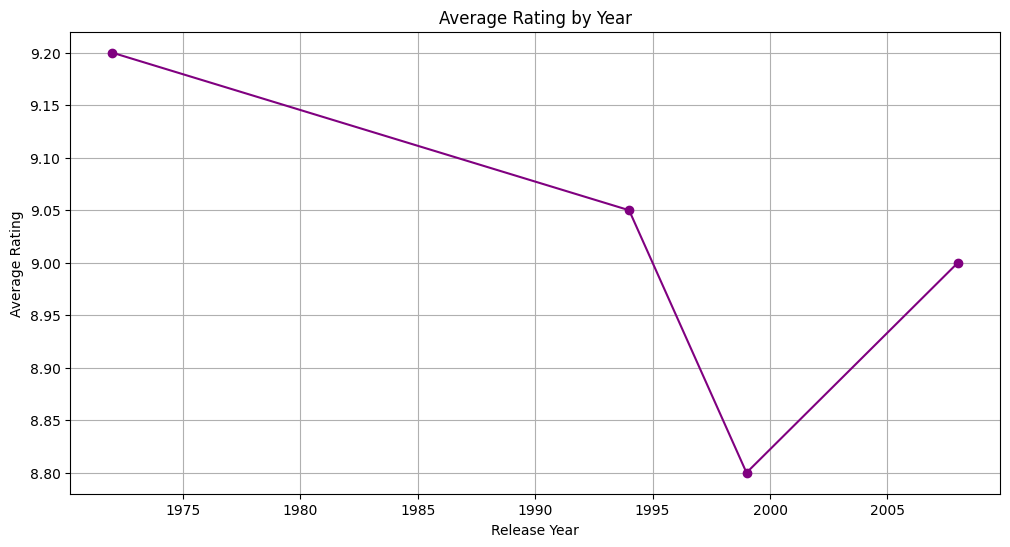

In [22]:
# Analyze Average Rating by Year
# Group by release year and calculate average rating
avg_rating_by_year = df.groupby('year')['rating'].mean()

# Plot the average rating by year
plt.figure(figsize=(12, 6))
avg_rating_by_year.plot(kind='line', marker='o', color='purple')
plt.title('Average Rating by Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()